In [1]:
# Importing all the libraries that we are using in this project
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime

import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
plt.style.use('fivethirtyeight')
%matplotlib inline 

In [2]:
# # To read data from a CSV file
# total_cases = pd.read_csv('total_cases.csv')

In [3]:
# To read data from an online file
total_cases = pd.read_csv('https://covid.ourworldindata.org/data/ecdc/total_cases.csv')

In [4]:
total_cases.head()

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,2019-12-31,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2020-01-01,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,2020-01-02,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,2020-01-03,44,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,2020-01-04,44,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [5]:
usa_cases = total_cases['World']
usa_cases = np.array([i for i in usa_cases]).reshape(-1, 1)[21:]
usa_cases[:10]

array([[ 392],
       [ 534],
       [ 631],
       [ 897],
       [1350],
       [2023],
       [2820],
       [4587],
       [6067],
       [7823]])

In [6]:
dates = total_cases['date'][21:]
dates[:10]

21    2020-01-21
22    2020-01-22
23    2020-01-23
24    2020-01-24
25    2020-01-25
26    2020-01-26
27    2020-01-27
28    2020-01-28
29    2020-01-29
30    2020-01-30
Name: date, dtype: object

In [7]:
days_since = np.array([day for day in range(len(dates))]).reshape(-1, 1)
days_since[-10:]

array([[77],
       [78],
       [79],
       [80],
       [81],
       [82],
       [83],
       [84],
       [85],
       [86]])

In [8]:
# Forecasting for next 10 days
num_future_days = 10
future_forcast = np.array([i for i in range(len(dates)+num_future_days)]).reshape(-1,1)
days_added = future_forcast[-10:]

In [9]:
X_train_confirmed_cases, X_test_confirmed_cases, Y_train_confirmed_cases, Y_test_confirmed_cases = train_test_split(days_since, usa_cases, test_size=0.05, shuffle=False)

In [10]:
# # Building the SVM model
# # Use this cell to get the best fit parameters for the model

# kernel = ['poly', 'sigmoid', 'rbf']
# c = [0.01, 0.1, 1, 10]
# gamma = [0.01, 0.1, 1]
# epsilon = [0.01, 0.1, 1]
# shrinking = [True, False]
# degree = [3, 4, 5, 6, 7]
# svm_grid = {
#     'kernel': kernel,
#     'C': c,
#     'gamma': gamma,
#     'epsilon': epsilon,
#     'shrinking': shrinking,
# #     'degree': degree
# }
# svm = SVR()
# svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
# svm_search.fit(X_train_confirmed_cases, Y_train_confirmed_cases)

In [11]:
# Prints the best fit parameters for the model
# svm_search.best_params_

In [12]:
# svm_confirmed = svm_search.best_estimator_
# svm_predict = svm_confirmed.predict(future_forcast)
# #shrinking=True, kernel='poly',gamma=1, epsilon=0.01, C=10

In [13]:
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.2)
svm_confirmed.fit(X_train_confirmed_cases, Y_train_confirmed_cases)
svm_predict = svm_confirmed.predict(future_forcast)

/home/bhargav/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
svm_confirmed

SVR(C=0.2, cache_size=200, coef0=0.0, degree=5, epsilon=1, gamma=0.01,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [15]:
svm_predict[-10:]

array([2355830.76654624, 2493360.49028175, 2637285.67781316,
       2787826.83373766, 2945209.47380011, 3109664.18119846,
       3281426.66288833, 3460737.80588971, 3647843.73358809,
       3842995.86204927])

In [16]:
svm_predict = [round(i, 2) for i in svm_predict]

In [17]:
# Converting integer dates to date formats for better visualization
start_date = "2020-01-21"
start_date = datetime.datetime.strptime(start_date, '%Y-%m-%d')
forcast_dates = []
for i in range(len(future_forcast)):
    forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%Y-%m-%d'))

In [18]:
predicted_values = pd.DataFrame({'Date': forcast_dates[-10:], 'SVM predictions': svm_predict[-10:]})
predicted_values

,Date,SVM predictions
0,2020-04-17,2355830.77
1,2020-04-18,2493360.49
2,2020-04-19,2637285.68
3,2020-04-20,2787826.83
4,2020-04-21,2945209.47
5,2020-04-22,3109664.18
6,2020-04-23,3281426.66
7,2020-04-24,3460737.81
8,2020-04-25,3647843.73
9,2020-04-26,3842995.86


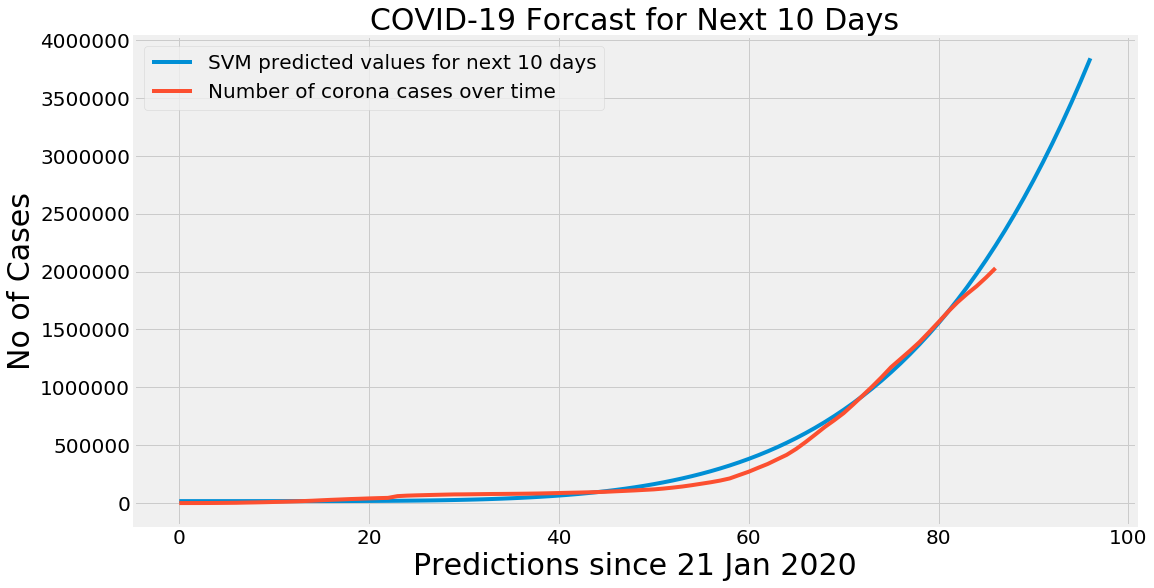

In [19]:
plt.figure(figsize=(16, 9))
plt.plot(future_forcast, svm_predict)
plt.plot(days_since, usa_cases)
plt.legend(['SVM predicted values for next 10 days', 'Number of corona cases over time'],prop={'size': 20})
plt.title('COVID-19 Forcast for Next 10 Days', size=30)
plt.xlabel('Predictions since 21 Jan 2020', size=30)
plt.ylabel('No of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [20]:
daily_cases = []
prev = 0
for i in usa_cases:
    daily_cases.append(abs(i[0]-prev))
    prev = i[0]
    
daily_cases = np.array([i for i in daily_cases]).reshape(-1,1)
print(daily_cases[:10])

[[ 392]
 [ 142]
 [  97]
 [ 266]
 [ 453]
 [ 673]
 [ 797]
 [1767]
 [1480]
 [1756]]


In [21]:
X_train_daily_cases, X_test_daily_cases, Y_train_daily_cases, Y_test_daily_cases = train_test_split(days_since, daily_cases, test_size=0.05, shuffle=False)

In [22]:
# # Building the SVM model
# # Use this cell to get the best fit parameters for the model

# kernel = ['poly', 'sigmoid', 'rbf']
# c = [0.01, 0.1, 1, 10]
# gamma = [0.01, 0.1, 1]
# epsilon = [0.01, 0.1, 1]
# shrinking = [True, False]
# degree = [3, 4, 5, 6, 7]
# svm_grid = {
#     'kernel': kernel,
#     'C': c,
#     'gamma': gamma,
#     'epsilon': epsilon,
#     'shrinking': shrinking,
# #     'degree': degree
# }
# svm_daily_cases = SVR()
# svm_daily_search = RandomizedSearchCV(svm_daily_cases, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
# svm_daily_search.fit(X_train_daily_cases, Y_train_daily_cases)

In [23]:
# # Prints the best fit parameters for the model
# svm_daily_search.best_params_

In [24]:
# svm_daily_cases = svm_daily_search.best_estimator_
# svm_daily_predict = svm_daily_cases.predict(future_forcast)
# # shrinking: False, kernel: 'poly', gamma: 0.1, epsilon: 0.01, C: 10

In [78]:
svm_daily_cases = SVR(shrinking= False, kernel= 'poly', gamma= 0.1, epsilon= 0.01, degree=3, C= 10)
svm_daily_cases.fit(X_train_daily_cases, Y_train_daily_cases)
svm_daily_predict = svm_daily_cases.predict(future_forcast)

/home/bhargav/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [79]:
svm_daily_cases

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.1,
    kernel='poly', max_iter=-1, shrinking=False, tol=0.001, verbose=False)

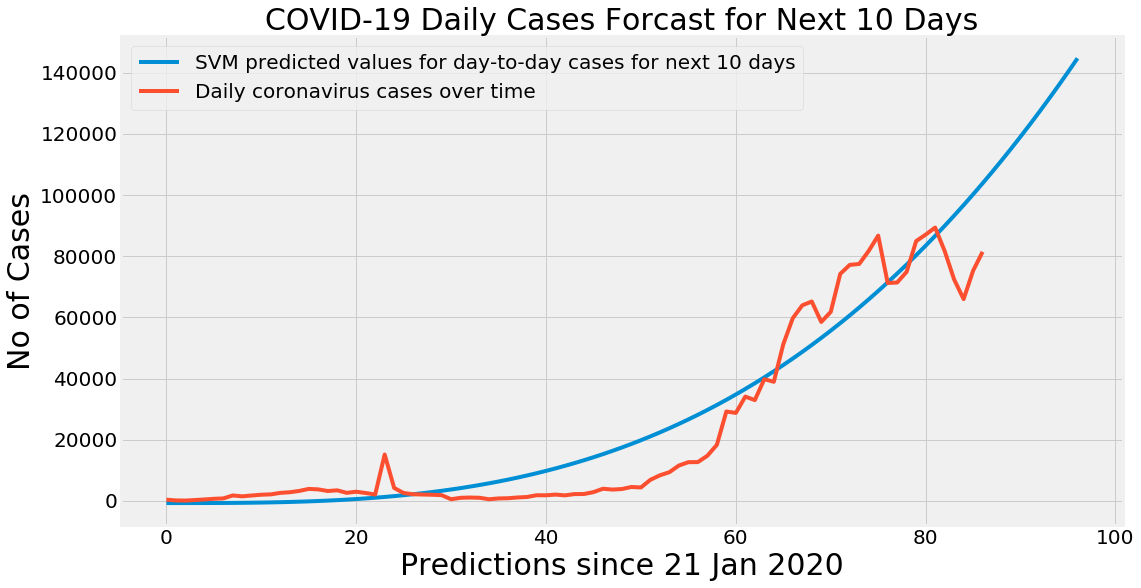

In [80]:
plt.figure(figsize=(16, 9))
plt.plot(future_forcast, svm_daily_predict)
plt.plot(days_since, daily_cases)
plt.legend(['SVM predicted values for day-to-day cases for next 10 days', 'Daily coronavirus cases over time'],prop={'size': 20})
plt.title('COVID-19 Daily Cases Forcast for Next 10 Days', size=30)
plt.xlabel('Predictions since 21 Jan 2020', size=30)
plt.ylabel('No of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [57]:
# Transforming the data for polynomial Regression
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed_cases)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed_cases)
poly_future_forcast = poly.fit_transform(future_forcast)

In [58]:
# Linear Regression modal for world wide cases
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, Y_train_confirmed_cases)
linear_pred = linear_model.predict(poly_future_forcast)

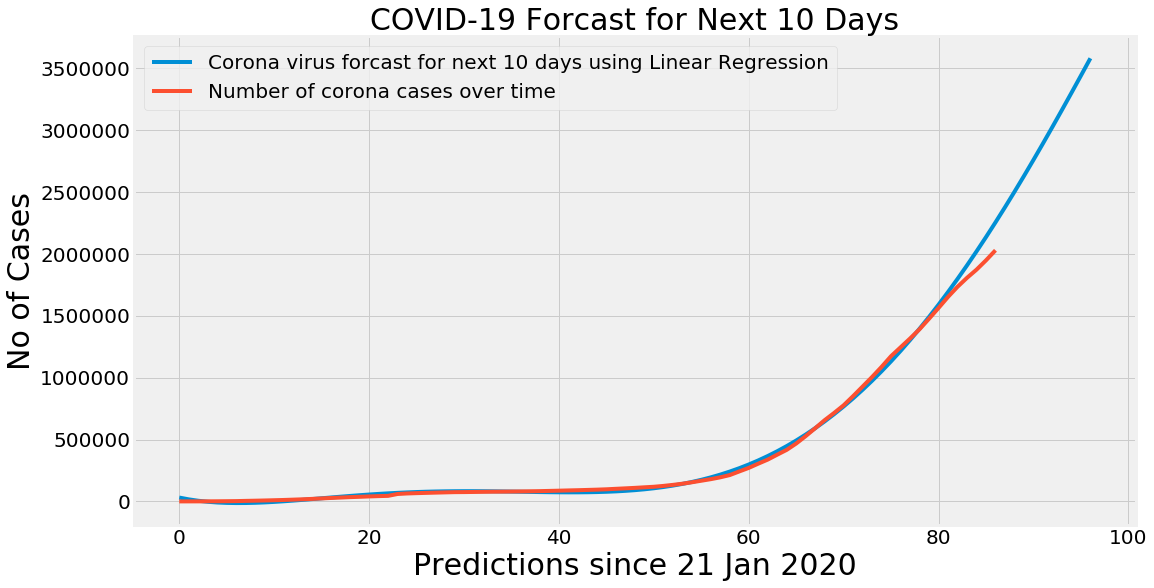

In [82]:
plt.figure(figsize=(16, 9))
plt.plot(future_forcast, linear_pred)
plt.plot(days_since, usa_cases)
plt.legend(['Corona virus forcast for next 10 days using Linear Regression', 'Number of corona cases over time'],prop={'size': 20})
plt.title('COVID-19 Forcast for Next 10 Days', size=30)
plt.xlabel('Predictions since 21 Jan 2020', size=30)
plt.ylabel('No of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [31]:
from sklearn.linear_model import BayesianRidge

In [63]:
# bayesian ridge polynomial regression
tol = [1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2}

bayesian = BayesianRidge(fit_intercept=False, normalize=True)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(poly_X_train_confirmed, Y_train_confirmed_cases)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.1s finished
/home/bhargav/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/bhargav/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           compute_score=False, copy_X=True,
                                           fit_intercept=False, lambda_1=1e-06,
                                           lambda_2=1e-06, n_iter=300,
                                           normalize=True, tol=0.001,
                                           verbose=False),
                   iid='warn', n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001],
                                        'lambda_2': [1e

In [64]:
bayesian_search.best_params_

{'tol': 0.0001,
 'lambda_2': 1e-07,
 'lambda_1': 1e-07,
 'alpha_2': 1e-06,
 'alpha_1': 1e-07}

In [67]:
bayesian_confirmed = bayesian_search.best_estimator_
bayesian_predict = bayesian_confirmed.predict(poly_future_forcast)

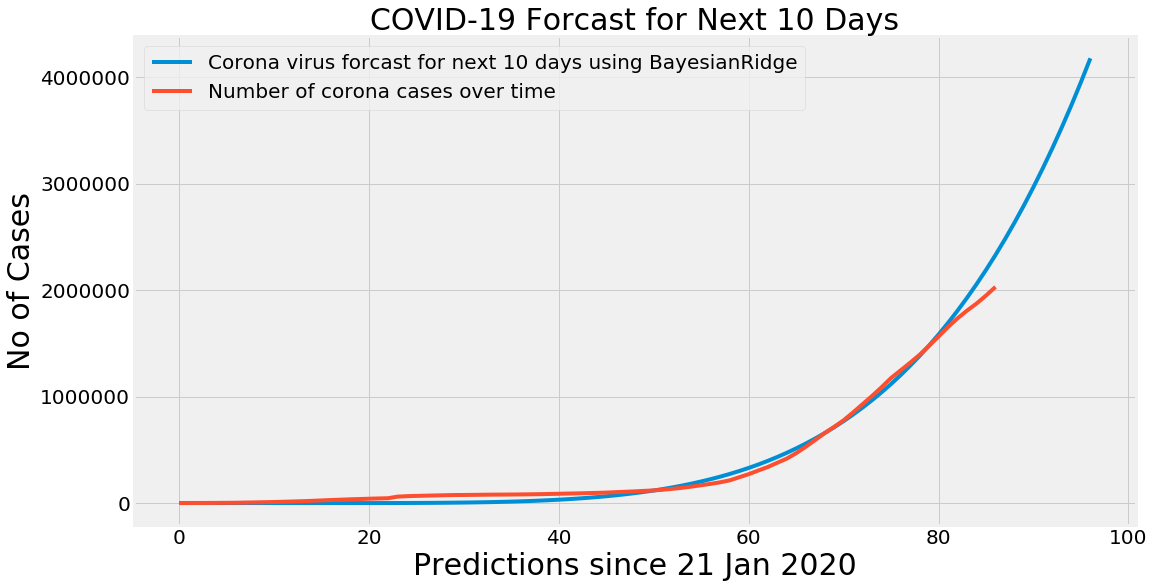

In [68]:
plt.figure(figsize=(16, 9))
plt.plot(future_forcast, bayesian_predict)
plt.plot(days_since, usa_cases)
plt.legend(['Corona virus forcast for next 10 days using BayesianRidge', 'Number of corona cases over time'],prop={'size': 20})
plt.title('COVID-19 Forcast for Next 10 Days', size=30)
plt.xlabel('Predictions since 21 Jan 2020', size=30)
plt.ylabel('No of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()